# Tb Mean

In [1]:
import pandas as pd
features_and_target = pd.read_csv('data_with_everything.csv')


In [2]:

features_and_target.columns

Index(['altmetric_id', 'tweet_id', 'tweet_url', 'tweet_post_date',
       'twitter_author_url', 'selected_quotes', 'twitter_author_description',
       'twitter_author_id', 'twitter_author_handle',
       'twitter_author_followers', 'twitter_author_name', 'paper_title',
       'paper_abstract', 'paper_doi', 'paper_pubdate', 'twitter_rt_count',
       'subjects', 'Publisher_subjects', 'Scopus_Subjects', 'Count_HashTags',
       'Abstract_Length', 'followers_count', 'author_count', 'title_Vader',
       'abstract_Vader', 'Tw_Vader_mean', 'Tw_Vader_median', 'title_TB',
       'abstract_TB', 'Tw_TB_mean', 'Tw_TB_median'],
      dtype='object')

In [3]:
final_score_list=[]
for val in features_and_target['Tw_TB_mean']:
    if val > 0:
        final_score_list.append(1)
    elif val < 0:
        final_score_list.append(-1)
    else:
        final_score_list.append(0)

print(len(final_score_list))

features_and_target = features_and_target.assign(class_label_Tb_mean=final_score_list)
 

148712


In [4]:
features_and_target.columns

Index(['altmetric_id', 'tweet_id', 'tweet_url', 'tweet_post_date',
       'twitter_author_url', 'selected_quotes', 'twitter_author_description',
       'twitter_author_id', 'twitter_author_handle',
       'twitter_author_followers', 'twitter_author_name', 'paper_title',
       'paper_abstract', 'paper_doi', 'paper_pubdate', 'twitter_rt_count',
       'subjects', 'Publisher_subjects', 'Scopus_Subjects', 'Count_HashTags',
       'Abstract_Length', 'followers_count', 'author_count', 'title_Vader',
       'abstract_Vader', 'Tw_Vader_mean', 'Tw_Vader_median', 'title_TB',
       'abstract_TB', 'Tw_TB_mean', 'Tw_TB_median', 'class_label_Tb_mean'],
      dtype='object')

In [5]:

features_and_target_to_use = features_and_target[['Scopus_Subjects','title_TB','abstract_TB',\
                                                  'Count_HashTags','Abstract_Length','followers_count','author_count',\
                                                  'class_label_Tb_mean']]

In [6]:
# observing the counts of positive and negative
from collections import Counter
tw_Tb_mean_class_list =features_and_target_to_use['class_label_Tb_mean'].tolist()
a = dict(Counter(tw_Tb_mean_class_list))
print(a)

{1: 67035, 0: 64796, -1: 16881}


In [7]:
features_and_target_to_use.shape

(148712, 8)

In [8]:
# considering only +1 and -1
features_and_target_to_use_2_labels = features_and_target_to_use[features_and_target_to_use.class_label_Tb_mean != 0]

In [ ]:
features_and_target_to_use_2_labels.shape

(83916, 8)

In [ ]:
# observing the counts of positive and negative
from collections import Counter
tw_Tb_mean_class_list =features_and_target_to_use_2_labels['class_label_Tb_mean'].tolist()
a = dict(Counter(tw_Tb_mean_class_list))
print(a)

{1: 67035, -1: 16881}


In [ ]:
features_and_target_to_use_2_labels.columns  = ['Scopus Subjects', 'Title Sentiment','Abstract Sentiment', 'Hashtag Count','Abstract Length','Tweet Reach','Author Count','Tweet Sentiment']

In [ ]:
features_and_target_to_use_2_labels.columns

Index(['Scopus Subjects', 'Title Sentiment', 'Abstract Sentiment',
       'Hashtag Count', 'Abstract Length', 'Tweet Reach', 'Author Count',
       'Tweet Sentiment'],
      dtype='object')

In [ ]:
features_and_target_to_use_2_labels

,Scopus Subjects,Title Sentiment,Abstract Sentiment,Hashtag Count,Abstract Length,Tweet Reach,Author Count,Tweet Sentiment
0,Medicine,0.0000,0.2679,4,1822,1312,6.0,1
2,Health Sciences,0.2375,0.2111,0,939,2612,3.0,1
4,"Biochemistry, Genetics and Molecular Biology",0.0000,0.1696,4,998,3858,11.0,1
5,"Biochemistry, Genetics and Molecular Biology",0.0000,0.2536,6,1768,3907,11.0,1
15,Medicine,0.0000,-0.1147,1,1726,641,3.0,1
17,"Biochemistry, Genetics and Molecular Biology",0.1667,0.1237,1,1128,2524,8.0,1
18,Medicine,0.0000,0.1938,4,2329,4043,4.0,1
19,Physical Sciences,0.4550,0.1120,1,1754,9376,3.0,1
20,Medicine,0.0000,0.0000,1,247,3798,7.0,1
22,Chemical Engineering,0.1000,0.0427,2,1015,7710,10.0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
corrMatrix = features_and_target_to_use_2_labels.corr()
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

In [15]:
'''
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(features_and_target_to_use_2_labels, hue='class_label_Tb_mean')
'''

"\n# Seaborn visualization library\nimport seaborn as sns\n# Create the default pairplot\nsns.pairplot(features_and_target_to_use_2_labels, hue='class_label_Tb_mean')\n"

Standard scaling

In [16]:
print(features_and_target_to_use_2_labels['Scopus Subjects'].unique())

print(len(features_and_target_to_use_2_labels['Scopus Subjects'].unique()))

['Medicine' 'Health Sciences'
 'Biochemistry, Genetics and Molecular Biology' 'Physical Sciences'
 'Chemical Engineering' 'Veterinary' 'Psychology' 'General'
 'Environmental Science' 'Social Sciences' 'Life Sciences'
 'Agricultural and Biological Sciences' 'Nursing' 'Health Professions'
 'Materials Science' 'Arts and Humanities' 'Dentistry'
 'Physics and Astronomy' 'Chemistry'
 'Pharmacology, Toxicology and Pharmaceutics' 'Mathematics'
 'Immunology and Microbiology' 'Energy' 'Engineering'
 'Business, Management and Accounting']
25


In [17]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)




# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=300)
DT.fit(X_train, y_train)

# Predicting the Test set results
y_predDT = DT.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predDT)

import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predDT))
print('Precision',sklearn.metrics.precision_score(y_test, y_predDT))
print('Recall',sklearn.metrics.recall_score(y_test, y_predDT))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predDT))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = DT, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ["gini"], 'max_depth': [1,2,3,14,15], 'min_samples_split': [4,6,8,300,450,600]},
               {'criterion': ["entropy"], 'max_depth': [1,2,13,14,15], 'min_samples_split': [4,6,250,425,450,475,575,600]}]
grid_search = GridSearchCV(estimator = DT,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predDT)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()

print('feature importances')
print(features_and_target_to_use_2_labels.columns)
print(DT.feature_importances_)
print()

/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
Using TensorFlow backend.


Frequency of unique values of the said array:
[[   -1     1]
 [16881 67035]]
Frequency of unique values of the said array:
[[   -1     1]
 [67035 67035]]
Accuracy 0.8718579846348922
Precision 0.8405145584065288
Recall 0.9149288564330347
F-1 score 0.8761444740826184

confusion matrix
[[11225  2306]
 [ 1130 12153]]

accuracies mean 0.8719791348523012
accuracies with 2 SD 0.005014327432372977

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  6.6min finished



classification report
              precision    recall  f1-score   support

          -1       0.91      0.83      0.87     13531
           1       0.84      0.91      0.88     13283

    accuracy                           0.87     26814
   macro avg       0.87      0.87      0.87     26814
weighted avg       0.87      0.87      0.87     26814


best accuracy 0.8739277989110167
best parameters
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 250}

feature importances
Index(['Scopus Subjects', 'Title Sentiment', 'Abstract Sentiment',
       'Hashtag Count', 'Abstract Length', 'Tweet Reach', 'Author Count',
       'Tweet Sentiment'],
      dtype='object')
[1.48094142e-03 0.00000000e+00 5.70167659e-02 0.00000000e+00
 0.00000000e+00 6.24958790e-05 6.06415494e-06 0.00000000e+00
 0.00000000e+00 6.81252872e-05 1.32231880e-03 1.14921640e-04
 1.29516708e-02 0.00000000e+00 1.46717206e-03 1.57453544e-04
 0.00000000e+00 1.41956362e-01 0.00000000e+00 0.00000000e+00
 1.57051588e-03 

In [18]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth= 20, min_samples_split=600, n_estimators=60)
RF.fit(X_train, y_train)

# Predicting the Test set results
y_predRF = RF.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRF)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predRF))
print('Precision',sklearn.metrics.precision_score(y_test, y_predRF))
print('Recall',sklearn.metrics.recall_score(y_test, y_predRF))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predRF))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()


# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ["entropy"], 'max_depth': [10,20,40,60,80,100,120], 'min_samples_split': [20,40,60,80], 'n_estimators':[10,20,30,40], 'bootstrap':[False]}]
grid_search = GridSearchCV(estimator = RF,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predRF)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()

print('feature importances')
print(features_and_target_to_use_2_labels.columns)
print(RF.feature_importances_)
print()


Frequency of unique values of the said array:
[[   -1     1]
 [16881 67035]]


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [67035 67035]]
Accuracy 0.8804355933467591
Precision 0.8431986921871807
Recall 0.9319430851464278
F-1 score 0.885352596195108

confusion matrix
[[11229  2302]
 [  904 12379]]

accuracies mean 0.8825240852366877
accuracies with 2 SD 0.006736183864692299

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed: 92.0min finished



classification report
              precision    recall  f1-score   support

          -1       0.93      0.83      0.88     13531
           1       0.84      0.93      0.89     13283

    accuracy                           0.88     26814
   macro avg       0.88      0.88      0.88     26814
weighted avg       0.88      0.88      0.88     26814


best accuracy 0.8946818825986425
best parameters
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 60, 'min_samples_split': 20, 'n_estimators': 30}

feature importances
Index(['Scopus Subjects', 'Title Sentiment', 'Abstract Sentiment',
       'Hashtag Count', 'Abstract Length', 'Tweet Reach', 'Author Count',
       'Tweet Sentiment'],
      dtype='object')
[5.02895388e-03 3.97497632e-05 1.28719775e-01 1.11258895e-05
 1.53489445e-04 3.55436564e-05 2.50053313e-04 0.00000000e+00
 0.00000000e+00 2.79410614e-03 9.12676274e-03 6.76698138e-04
 4.72058323e-02 0.00000000e+00 1.92117431e-02 1.74042209e-03
 1.13118616e-05 1.41954215e-01 3.74453

In [19]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


##Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.1, multi_class='ovr', penalty='l1', solver= 'liblinear')
LR.fit(X_train, y_train)
y_predLR = LR.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predLR)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predLR))
print('Precision',sklearn.metrics.precision_score(y_test, y_predLR))
print('Recall',sklearn.metrics.recall_score(y_test, y_predLR))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predLR))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
accuracies.mean()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty': ["l1"], 'C': [0.1,0.2,0.5,0.8,1,1.2,1.4], 'solver':['liblinear','saga'], 'multi_class':['ovr']},
             {'penalty': ["l2"], 'C': [0.1,0.2,0.5,0.8,1,1.2,1.4], 'solver':['newton-cg','lbfgs','sag'], 'multi_class':['ovr', 'multinomial']}
             ]
grid_search = GridSearchCV(estimator = LR,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

from sklearn.metrics import classification_report
report =classification_report(y_test, y_predLR)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()


Frequency of unique values of the said array:
[[   -1     1]
 [16881 67035]]


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [67035 67035]]
Accuracy 0.7276422764227642
Precision 0.7189513766842414
Recall 0.7391402544605887
F-1 score 0.7289060469950629

confusion matrix
[[9693 3838]
 [3465 9818]]

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed: 15.4min finished


accuracies mean 0.7278849171547176
accuracies with 2 SD 0.010971562566958339


classification report
              precision    recall  f1-score   support

          -1       0.74      0.72      0.73     13531
           1       0.72      0.74      0.73     13283

    accuracy                           0.73     26814
   macro avg       0.73      0.73      0.73     26814
weighted avg       0.73      0.73      0.73     26814


best accuracy 0.7279685984933244
best parameters
{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}



In [20]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

# Predicting the Test set results
y_predNB = NB.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predNB)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predNB))
print('Precision',sklearn.metrics.precision_score(y_test, y_predNB))
print('Recall',sklearn.metrics.recall_score(y_test, y_predNB))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predNB))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

from sklearn.metrics import classification_report
report =classification_report(y_test, y_predNB)

print()
print('classification report')
print(report)
print()


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [16881 67035]]
Frequency of unique values of the said array:
[[   -1     1]
 [67035 67035]]
Accuracy 0.5087267845155515
Precision 0.5948275862068966
Recall 0.02597304825717082
F-1 score 0.0497727764553127

confusion matrix
[[13296   235]
 [12938   345]]

accuracies mean 0.5069832414147687
accuracies with 2 SD 0.007881208367846787


classification report
              precision    recall  f1-score   support

          -1       0.51      0.98      0.67     13531
           1       0.59      0.03      0.05     13283

    accuracy                           0.51     26814
   macro avg       0.55      0.50      0.36     26814
weighted avg       0.55      0.51      0.36     26814




In [21]:
# taking features
X = features_and_target_to_use_2_labels.iloc[:, :-1].values
y = features_and_target_to_use_2_labels.iloc[:, 7].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

from imblearn.over_sampling import SMOTE
import numpy as np
# observing the counts of positive and negative before SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# applying SMOTE
smt = SMOTE()
X, y = smt.fit_sample(X, y)
# checking the rows
# observing the counts of positive and negative after SMOTE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


# splitiing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 160, algorithm= 'auto')
KNN.fit(X_train, y_train)

# Predicting the Test set results
y_predKNN = KNN.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predKNN)


import sklearn.metrics
print('Accuracy',sklearn.metrics.accuracy_score(y_test, y_predKNN))
print('Precision',sklearn.metrics.precision_score(y_test, y_predKNN))
print('Recall',sklearn.metrics.recall_score(y_test, y_predKNN))
print('F-1 score',sklearn.metrics.f1_score(y_test, y_predKNN))

print()
print('confusion matrix')
print(cm)
print()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = KNN, X = X_train, y = y_train, cv = 10)
print('accuracies mean',accuracies.mean())
print('accuracies with 2 SD', accuracies.std() * 2)
print()

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'n_neighbors': [5,10,20,25,30,40,50,100,120,140,160,180,200,220,240], 'algorithm': ['ball_tree','kd_tree']}]
grid_search = GridSearchCV(estimator = KNN,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1, verbose=1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


from sklearn.metrics import classification_report
report =classification_report(y_test, y_predKNN)

print()
print('classification report')
print(report)
print()

print('best accuracy', best_accuracy)
print('best parameters')
print(best_parameters)
print()


Frequency of unique values of the said array:
[[   -1     1]
 [16881 67035]]


/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/akhil/.pyenv/versions/3.6.5/envs/p3w/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Frequency of unique values of the said array:
[[   -1     1]
 [67035 67035]]
Accuracy 0.7816439173566048
Precision 0.7125686813186813
Recall 0.9372882631935556
F-1 score 0.8096244513087303

confusion matrix
[[ 8509  5022]
 [  833 12450]]

accuracies mean 0.7809445702414297
accuracies with 2 SD 0.005350549208584394

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 157.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 327.5min finished



classification report
              precision    recall  f1-score   support

          -1       0.91      0.63      0.74     13531
           1       0.71      0.94      0.81     13283

    accuracy                           0.78     26814
   macro avg       0.81      0.78      0.78     26814
weighted avg       0.81      0.78      0.78     26814


best accuracy 0.8153669724770642
best parameters
{'algorithm': 'ball_tree', 'n_neighbors': 5}



<Figure size 432x288 with 0 Axes>

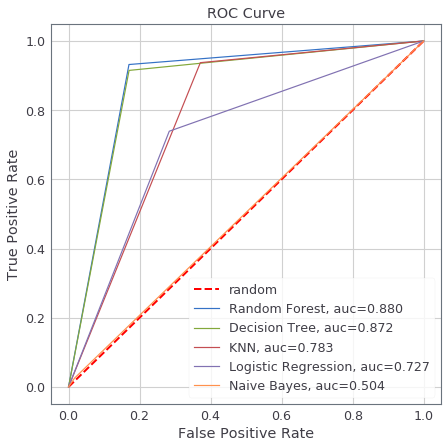

In [22]:
"""PLOTTING"""

from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(0).clf()

plt.figure(figsize=(7,7))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

x = [0.0, 1.0]
plt.plot(x, x, linestyle='dashed', color='red', linewidth=2, label='random')

#RF
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predRF)
auc = metrics.roc_auc_score(y_test, y_predRF)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc)[:5])

#DT
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predDT)
auc = metrics.roc_auc_score(y_test, y_predDT)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc)[:5])

#KNN
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predKNN)
auc = metrics.roc_auc_score(y_test, y_predKNN)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc)[:5])

#LR
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predLR)
auc = metrics.roc_auc_score(y_test, y_predLR)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc)[:5])

#NB
fpr, tpr, thresh = metrics.roc_curve(y_test, y_predNB)
auc = metrics.roc_auc_score(y_test, y_predNB)
plt.plot(fpr,tpr,label="Naive Bayes, auc="+str(auc)[:5])

plt.legend(loc='lower right')

plt.show()